In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json

In [18]:
data = pd.read_csv('orders.csv')
data.sample(n = 5, replace = False) # replace = False krny ka matlab y h k jo row ek baar pick kr li vo dubara pock nhi 
# krni h

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
7414,7415,2022-12-14,Second Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Furniture,Chairs,FUR-CH-10004287,320,390,2,3
2170,2171,2022-07-30,Second Class,Consumer,United States,Kent,Ohio,44240,East,Technology,Phones,TEC-PH-10003931,100,110,3,2
3967,3968,2022-06-28,First Class,Home Office,United States,Colorado Springs,Colorado,80906,West,Office Supplies,Binders,OFF-BI-10003638,30,40,7,3
8105,8106,2022-06-27,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,FUR-BO-10001601,80,90,1,4
331,332,2022-04-11,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Technology,Phones,TEC-PH-10004614,70,80,2,3


In [ ]:
Pandas also allow plotting. The plot function in pandas allow to make plots

<Axes: xlabel='Category'>

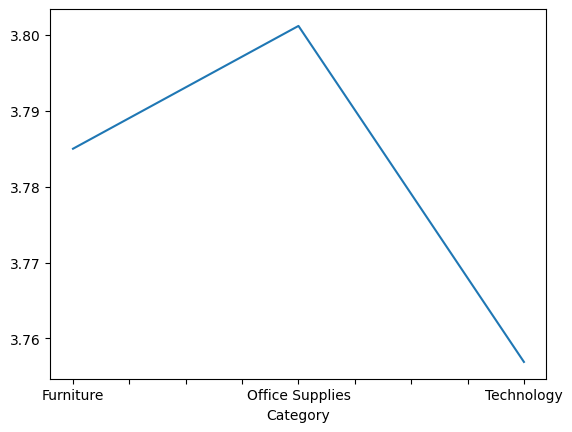

In [4]:
# Only keep numeric columns for mean
data.groupby('Category')['Quantity'].mean().plot()


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


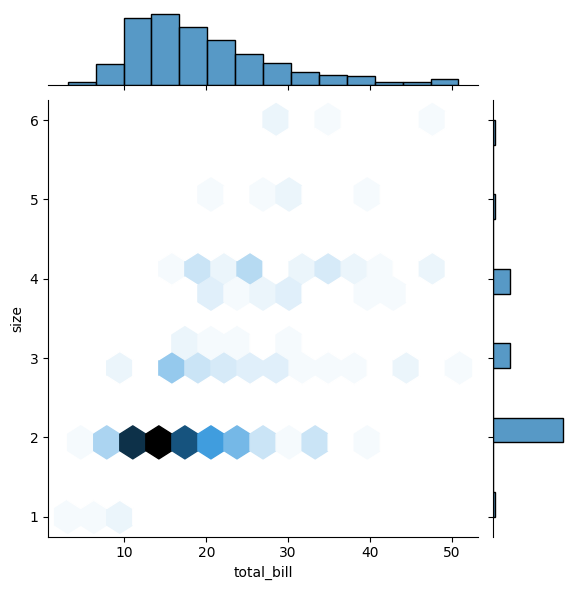

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = sns.load_dataset('tips')
print(data.head())

sns.jointplot(x = data['total_bill'], y = data['size'], kind = 'hex')

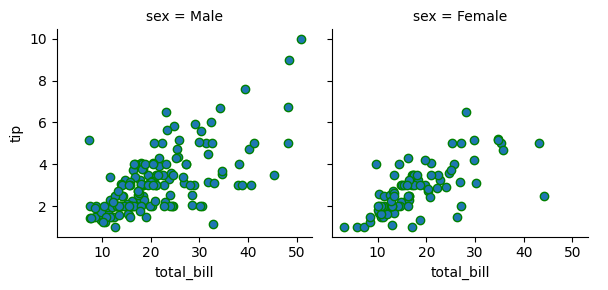

In [10]:

df=sns.load_dataset("tips")
y = sns.FacetGrid(df, col="sex")  #col="sex" krny s male and female ka graph alag
# alag show ho ga
y.map(plt.scatter, "total_bill","tip", edgecolor="g").add_legend()   #.add_legend() krna zruri h vrna legend 
                            # show nhi ho ga 
plt.show()

In [14]:
x = data.describe()

In [15]:
median = x.loc['50%']
# out_fields = ['mean','25%','50%','75%', 'max']
# all_data = x.loc[out_fields]
#   ----------------  OR  ------------------
all_data = x.loc[['mean','25%','50%','75%', 'max']]

all_data = all_data.rename(index={'50%': 'median'})
all_data

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
25%,13.347500,2.000000,2.000000
median,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

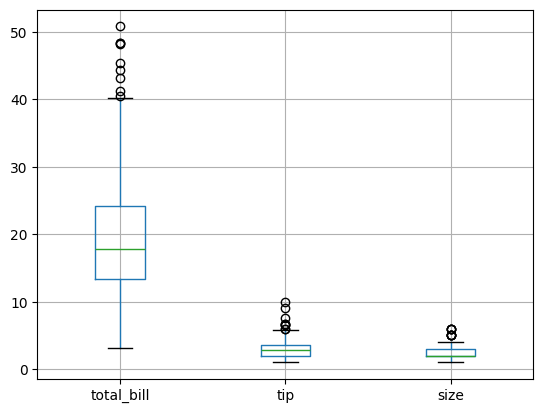

In [16]:
data.boxplot() 

In [19]:
data = data.groupby(['Segment','City'])['Quantity'].sum().reset_index(name = 'Quantity_sum')
data    #if we don't write reset_index, then groupby k andr jo columns likhyn hn vo index bn jayn gy and 
# just quatity vala ek column ho ga, jab reset_index likhyn gy to segment or city bhi columns hon gy and quantity bhi 
# column ho ga and index alag s show ho ga , AND PURPOSE OF NAME INSIDE RESET_INDEX MEANS K JO NEW COLUMN 
# BNA H YANI QUANTITY COLUMN, US KA NAME QIUANTITY RKHNA H , NAME K ANDR JO BHI LIKHA VO NEW COLUMN KA NAME H

,Segment,City,Quantity_sum
0,Consumer,Aberdeen,3
1,Consumer,Abilene,2
2,Consumer,Akron,40
3,Consumer,Albuquerque,10
4,Consumer,Alexandria,14
...,...,...,...
1021,Home Office,Wilmington,9
1022,Home Office,Wilson,5
1023,Home Office,Woodstock,2
1024,Home Office,Yonkers,8


In [20]:
geo = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/canada_provinces.geojson")
mp = json.loads(geo.text) 

# Choropleth

In [ ]:
mp = json.loads(geo.text)
    
fig = px.choropleth(geodata,
                    locations="ProvinceID",
                    geojson=mp,
                    featureidkey="properties.cartodb_id",
                    color="Average Gasoline Price",
                    color_continuous_scale=px.colors.diverging.Tropic,
                    scope='north america',
                    title='<b>Average Gasoline Price </b>',                
                    hover_name='Province',
                    hover_data={
                        'Average Gasoline Price' : True,
                        'ProvinceID' : False
                    },
                     
                    locationmode='geojson-id',
                    )
fig.update_layout(
    showlegend=True,
    legend_title_text='<b>Average Gasoline Price</b>',
    font={"size": 16, "color": "#808080", "family" : "calibri"},
    margin={"r":0,"t":40,"l":0,"b":0},
    legend=dict(orientation='v'),
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='#e0fffe')
)

#Show Canada only 
fig.update_geos(showcountries=False, showcoastlines=False,
                showland=False, fitbounds="locations",
                subunitcolor='white')
fig.show()

# DATA TRANSFORMATION

In [ ]:
Linear regression assumes that residual are normally distributed
--> To make variables normally distributed, we use log of each value of a variable or we can use log1p to prevent 
log0 issue
--> We can also add polynomial features to our data, if the relation between input features and output is not 
linear. adding polynomial features to data means adding more variables and then model will fit on all these 
 fearures. 

In [ ]:
from pyodide.http import pyfetch
 
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
            
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx"
 
await download(path, "airlines_data.xlsx")
 
data = pd.read_excel("airlines_data.xlsx")
 
data.head()

In [ ]:
duration = list(data1['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  .
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
data1['Duration_hours'] = dur_hours
data1['Duration_minutes'] =dur_minutes
data1.loc[:,'Duration_hours'] *= 60
data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']

# Feature Extraction using Principal Component Analysis

In [ ]:
Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

In the following portion of the lab, we will use scikit-learn library to perform some PCA on our data. To learn more about scikit-learn PCA, please visit this documentation.

First, we must scale our data using the StandardScaler() function. We will assign all the independent variables to x, and the dependent variable, 'price', to y.

In [ ]:
UNDERSTAND IT 